#### Machine Learning 4: Back to TensorFlow!!!
- But maybe with better data

In [4]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.activations import relu,linear,sigmoid
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, schedules
from tensorflow.keras.callbacks import History

tf.keras.backend.set_floatx('float64')
tf.autograph.set_verbosity(0)


from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
#!pip install openpyxl
survey = pd.read_excel('Retention_Dataset_2_CLEAN.xlsx')

survey.rename(columns={'Q20.1': 'Q20'}, inplace=True)
print(survey.shape)
survey.columns

Index(['Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q21', 'Q20', 'Q21_1', 'Q21_2', 'Q21_3',
       'Q21_11', 'Q21_12', 'Q21_13', 'Q21_14', 'Q21_15', 'Q21_16', 'Q21_17',
       'Q23_2', 'Q23_3', 'Q23_1', 'Q23_4', 'Q22_1', 'Q22_2', 'Q22_3', 'Q22_4',
       'Q22_5', 'Q22_6', 'Q22_8', 'Q22_7', 'Q24_1', 'Q24_2', 'Q24_8', 'Q24_3',
       'Q24_7', 'Q24_4', 'Q24_5', 'Q24_6', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7',
       'Q25_8', 'Q25_9', 'Spr_22_Ret', 'Fa_22_Ret',
       'Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Latinx',
       'Q27_Native Hawaiian or Pacific Islander', 'Q27_Other', 'Q27_White',
       'Q29_Female', 'Q29_Male', 'Q29_Non-binary / third gender',
       'Q29_Prefer not to say', 'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus'],
      dtype='object')

### Task 1: Create the training set & the result set

"just_data" will be the matrix of data that contains the survey data for each student.
"y_vals" will be the "matrix" of data that contains the retention result.

Both of these will then be converted into Numpy matrices that we will label "X" and "y."
Using these labels will allow us to reuse the code from the ML course with fewer changes.

In [13]:
data_columns = ['Q6', 'Q7', 'Q8', 'Q9', 'Q21', 'Q20', 'Q21_1', 'Q21_2', 'Q21_3',
       'Q21_11', 'Q21_12', 'Q21_13', 'Q21_14', 'Q21_15', 'Q21_16', 'Q21_17',
       'Q23_2', 'Q23_3', 'Q23_1', 'Q23_4', 'Q22_1', 'Q22_2', 'Q22_3', 'Q22_4',
       'Q22_5', 'Q22_6', 'Q22_8', 'Q22_7', 'Q24_1', 'Q24_2', 'Q24_8', 'Q24_3',
       'Q24_7', 'Q24_4', 'Q24_5', 'Q24_6', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7',
       'Q25_8', 'Q25_9', 'Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus'] #, 'Q22_Other']

just_data = survey[data_columns]
print(just_data.shape)

y_vals = survey[['Fa_22_Ret']]
y_vals.shape

(725, 57)


(725, 1)

In [14]:
these_cols = ['Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus'] #, 'Q22_Other']
for col in these_cols:
    just_data[col] = np.where(just_data[col] == True, 1, 0)

In [15]:
y_vals.value_counts()

Fa_22_Ret
1            604
0            121
dtype: int64

In [16]:
X = just_data.to_numpy()
y = y_vals.to_numpy()
y = y.ravel()

In [17]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0])

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [0 1 0 2 1 2 0 2 3 0 2 0 3 0 2 0 2 2 3 3 4 1 3 0 1 3 1 3 3 3 1 2 3 3 1 2 4
 0 3 3 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1]
The first element of y is:  0
The shape of X is: (725, 57)
The shape of y is: (725,)


#### Split the Dataset

In [18]:
#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.4, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_,y_,test_size=0.50, random_state=19)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_val.shape", X_val.shape, "y_val.shape", y_val.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (435, 57) y_train.shape (435,)
X_val.shape (145, 57) y_val.shape (145,)
X_test.shape (145, 57) y_test.shape (145,)


In [19]:
def graph_loss_vs_epochs(history):
    '''Generates a simple plot showing the loss descent across epochs. 
    Parameter is the history object associated with the TensorFlow model.'''
    train_loss = history.history['loss']
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    #plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

In [20]:
def plot_loss_vs_accuracy_complex(history):
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss vs accuracy 
    plt.figure(figsize=(15, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_loss) + 1), train_accuracy, label='Training Accuracy')
    plt.plot(range(1, len(val_loss) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # To avoid overlapping labels and titles
    plt.show()

In [21]:
def plot_loss_vs_accuracy(history):
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss and accuracy side-by-side
    plt.figure(figsize=(15, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [22]:
def learn_rate_vs_accuracy(learning_rates, val_accuracy):
    plt.plot(range(1, len(learning_rates) + 1), learning_rates, label='Learning Rate')
    plt.plot(range(1, len(learning_rates) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Rate')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # To avoid overlapping labels and titles
    plt.show()

In [23]:
def learn_rate_vs_TV_accuracy(learning_rates, train_accuracy, val_accuracy):
    #plt.plot(range(1, len(learning_rates) + 1), learning_rates, label='Learning Rate')
    #plt.plot(range(1, len(learning_rates) + 1), val_accuracy, label='Validation Accuracy')
    #plt.plot(range(1, len(learning_rates) + 1), train_accuracy, label='Training Accuracy')
    plt.plot(learning_rates, val_accuracy, label='Validation Accuracy')
    plt.plot(learning_rates, train_accuracy, label='Training Accuracy')
    plt.xlabel('Rate')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # To avoid overlapping labels and titles
    plt.show()

In [25]:
l2_rate = 0.000001
drop_rate = 0.5

small_model = Sequential(
        [
            tf.keras.Input(shape=(57,)),    #specify input size
            layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)),
            #layers.Dropout(drop_rate),
            #layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)),
            #layers.Dropout(drop_rate),
            layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)),
            #layers.Dropout(drop_rate),
            layers.Dense(units=1, activation='sigmoid')
        ], name = "Simple"
    )

small_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
    )

history = small_model.fit(
    X_train,y_train,
    epochs=1000, validation_data=(X_val, y_val)
)

Epoch 1/1000
14/14 [==============================] - 2s 55ms/step - loss: 0.5030 - accuracy: 0.7862 - val_loss: 0.4426 - val_accuracy: 0.8483
Epoch 2/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4383 - accuracy: 0.8322 - val_loss: 0.4384 - val_accuracy: 0.8414
Epoch 3/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4154 - accuracy: 0.8253 - val_loss: 0.4286 - val_accuracy: 0.8483
Epoch 4/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4042 - accuracy: 0.8299 - val_loss: 0.4255 - val_accuracy: 0.8414
Epoch 5/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.3929 - accuracy: 0.8368 - val_loss: 0.4261 - val_accuracy: 0.8414
Epoch 6/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.3789 - accuracy: 0.8322 - val_loss: 0.4242 - val_accuracy: 0.8414
Epoch 7/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.3728 - accuracy: 0.8368 - val_loss: 0.4342 - val_accuracy: 0.8414
Epoch

14/14 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.1728 - val_accuracy: 0.7931
Epoch 116/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0163 - accuracy: 0.9977 - val_loss: 1.1916 - val_accuracy: 0.7793
Epoch 117/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9977 - val_loss: 1.1745 - val_accuracy: 0.7862
Epoch 118/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.2015 - val_accuracy: 0.7862
Epoch 119/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9977 - val_loss: 1.1761 - val_accuracy: 0.7724
Epoch 120/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.2247 - val_accuracy: 0.7862
Epoch 121/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.1952 - val_accuracy: 0.7655
Epoch 1

Epoch 172/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.4791 - val_accuracy: 0.7655
Epoch 173/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.4880 - val_accuracy: 0.7655
Epoch 174/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.4902 - val_accuracy: 0.7655
Epoch 175/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.4748 - val_accuracy: 0.7655
Epoch 176/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5120 - val_accuracy: 0.7793
Epoch 177/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.5034 - val_accuracy: 0.7655
Epoch 178/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.5073 - val_accuracy

Epoch 229/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6809 - val_accuracy: 0.7793
Epoch 230/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6798 - val_accuracy: 0.7724
Epoch 231/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6972 - val_accuracy: 0.7862
Epoch 232/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6889 - val_accuracy: 0.7655
Epoch 233/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.7142 - val_accuracy: 0.7793
Epoch 234/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6959 - val_accuracy: 0.7724
Epoch 235/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7054 - val_accuracy:

14/14 [==============================] - 0s 8ms/step - loss: 7.0132e-04 - accuracy: 1.0000 - val_loss: 1.8408 - val_accuracy: 0.7862
Epoch 286/1000
14/14 [==============================] - 0s 8ms/step - loss: 7.1621e-04 - accuracy: 1.0000 - val_loss: 1.8472 - val_accuracy: 0.7793
Epoch 287/1000
14/14 [==============================] - 0s 8ms/step - loss: 7.0688e-04 - accuracy: 1.0000 - val_loss: 1.8375 - val_accuracy: 0.7793
Epoch 288/1000
14/14 [==============================] - 0s 8ms/step - loss: 6.9554e-04 - accuracy: 1.0000 - val_loss: 1.8578 - val_accuracy: 0.7862
Epoch 289/1000
14/14 [==============================] - 0s 8ms/step - loss: 7.1089e-04 - accuracy: 1.0000 - val_loss: 1.8416 - val_accuracy: 0.7862
Epoch 290/1000
14/14 [==============================] - 0s 8ms/step - loss: 7.0813e-04 - accuracy: 1.0000 - val_loss: 1.8603 - val_accuracy: 0.7793
Epoch 291/1000
14/14 [==============================] - 0s 8ms/step - loss: 6.8012e-04 - accuracy: 1.0000 - val_loss: 1.8529 - 

14/14 [==============================] - 0s 9ms/step - loss: 3.2389e-04 - accuracy: 1.0000 - val_loss: 2.0955 - val_accuracy: 0.7931
Epoch 396/1000
14/14 [==============================] - 0s 9ms/step - loss: 3.1985e-04 - accuracy: 1.0000 - val_loss: 2.0973 - val_accuracy: 0.7931
Epoch 397/1000
14/14 [==============================] - 0s 8ms/step - loss: 3.1967e-04 - accuracy: 1.0000 - val_loss: 2.1015 - val_accuracy: 0.7931
Epoch 398/1000
14/14 [==============================] - 0s 8ms/step - loss: 3.1999e-04 - accuracy: 1.0000 - val_loss: 2.1014 - val_accuracy: 0.7931
Epoch 399/1000
14/14 [==============================] - 0s 9ms/step - loss: 3.1921e-04 - accuracy: 1.0000 - val_loss: 2.1157 - val_accuracy: 0.7931
Epoch 400/1000
14/14 [==============================] - 0s 8ms/step - loss: 3.1531e-04 - accuracy: 1.0000 - val_loss: 2.1034 - val_accuracy: 0.7931
Epoch 401/1000
14/14 [==============================] - 0s 9ms/step - loss: 3.1274e-04 - accuracy: 1.0000 - val_loss: 2.1082 - 

14/14 [==============================] - 0s 6ms/step - loss: 2.1881e-04 - accuracy: 1.0000 - val_loss: 2.2980 - val_accuracy: 0.7862
Epoch 506/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.1838e-04 - accuracy: 1.0000 - val_loss: 2.3033 - val_accuracy: 0.7862
Epoch 507/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.1671e-04 - accuracy: 1.0000 - val_loss: 2.3105 - val_accuracy: 0.7862
Epoch 508/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.1577e-04 - accuracy: 1.0000 - val_loss: 2.3137 - val_accuracy: 0.7862
Epoch 509/1000
14/14 [==============================] - 0s 4ms/step - loss: 2.1571e-04 - accuracy: 1.0000 - val_loss: 2.3020 - val_accuracy: 0.7793
Epoch 510/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.1611e-04 - accuracy: 1.0000 - val_loss: 2.3155 - val_accuracy: 0.7862
Epoch 511/1000
14/14 [==============================] - 0s 4ms/step - loss: 2.1512e-04 - accuracy: 1.0000 - val_loss: 2.3100 - 

14/14 [==============================] - 0s 8ms/step - loss: 1.7888e-04 - accuracy: 1.0000 - val_loss: 2.4726 - val_accuracy: 0.7931
Epoch 616/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7871e-04 - accuracy: 1.0000 - val_loss: 2.4826 - val_accuracy: 0.7931
Epoch 617/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7860e-04 - accuracy: 1.0000 - val_loss: 2.4820 - val_accuracy: 0.7931
Epoch 618/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7831e-04 - accuracy: 1.0000 - val_loss: 2.4871 - val_accuracy: 0.7931
Epoch 619/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7826e-04 - accuracy: 1.0000 - val_loss: 2.4731 - val_accuracy: 0.7931
Epoch 620/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.7789e-04 - accuracy: 1.0000 - val_loss: 2.4857 - val_accuracy: 0.7931
Epoch 621/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7771e-04 - accuracy: 1.0000 - val_loss: 2.4938 - 

14/14 [==============================] - 0s 8ms/step - loss: 1.5939e-04 - accuracy: 1.0000 - val_loss: 2.6183 - val_accuracy: 0.7931
Epoch 726/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5924e-04 - accuracy: 1.0000 - val_loss: 2.6124 - val_accuracy: 0.7931
Epoch 727/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.5889e-04 - accuracy: 1.0000 - val_loss: 2.6209 - val_accuracy: 0.7931
Epoch 728/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.5893e-04 - accuracy: 1.0000 - val_loss: 2.6106 - val_accuracy: 0.8000
Epoch 729/1000
14/14 [==============================] - 0s 10ms/step - loss: 1.5864e-04 - accuracy: 1.0000 - val_loss: 2.6260 - val_accuracy: 0.7931
Epoch 730/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.5883e-04 - accuracy: 1.0000 - val_loss: 2.6155 - val_accuracy: 0.8000
Epoch 731/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5842e-04 - accuracy: 1.0000 - val_loss: 2.6151 -

14/14 [==============================] - 0s 9ms/step - loss: 1.4301e-04 - accuracy: 1.0000 - val_loss: 2.6974 - val_accuracy: 0.7931
Epoch 836/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.4272e-04 - accuracy: 1.0000 - val_loss: 2.6883 - val_accuracy: 0.7931
Epoch 837/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.4250e-04 - accuracy: 1.0000 - val_loss: 2.6908 - val_accuracy: 0.7931
Epoch 838/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.4240e-04 - accuracy: 1.0000 - val_loss: 2.6991 - val_accuracy: 0.7931
Epoch 839/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.4210e-04 - accuracy: 1.0000 - val_loss: 2.6821 - val_accuracy: 0.7931
Epoch 840/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.4199e-04 - accuracy: 1.0000 - val_loss: 2.7002 - val_accuracy: 0.7931
Epoch 841/1000
14/14 [==============================] - 0s 10ms/step - loss: 1.4182e-04 - accuracy: 1.0000 - val_loss: 2.6698 -

14/14 [==============================] - 0s 9ms/step - loss: 1.2406e-04 - accuracy: 1.0000 - val_loss: 2.7215 - val_accuracy: 0.7862
Epoch 946/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2379e-04 - accuracy: 1.0000 - val_loss: 2.7268 - val_accuracy: 0.7793
Epoch 947/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.2406e-04 - accuracy: 1.0000 - val_loss: 2.7165 - val_accuracy: 0.7862
Epoch 948/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.2372e-04 - accuracy: 1.0000 - val_loss: 2.7383 - val_accuracy: 0.8000
Epoch 949/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.2352e-04 - accuracy: 1.0000 - val_loss: 2.7326 - val_accuracy: 0.7931
Epoch 950/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.2306e-04 - accuracy: 1.0000 - val_loss: 2.7196 - val_accuracy: 0.7862
Epoch 951/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.2293e-04 - accuracy: 1.0000 - val_loss: 2.7461 - 

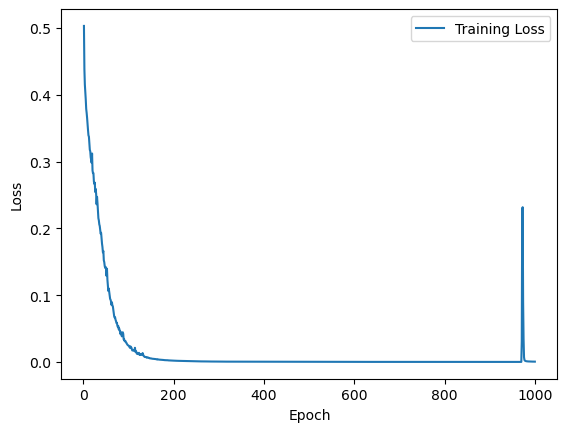

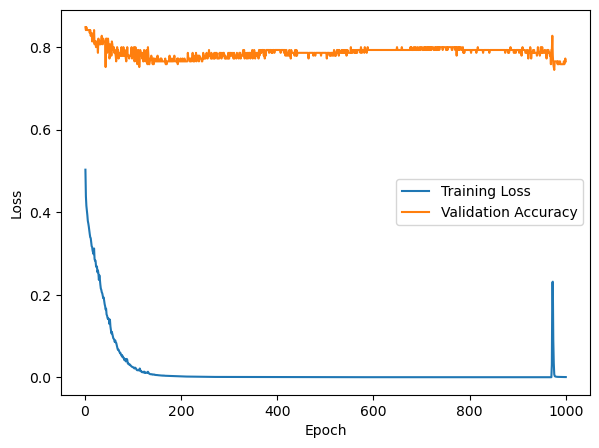

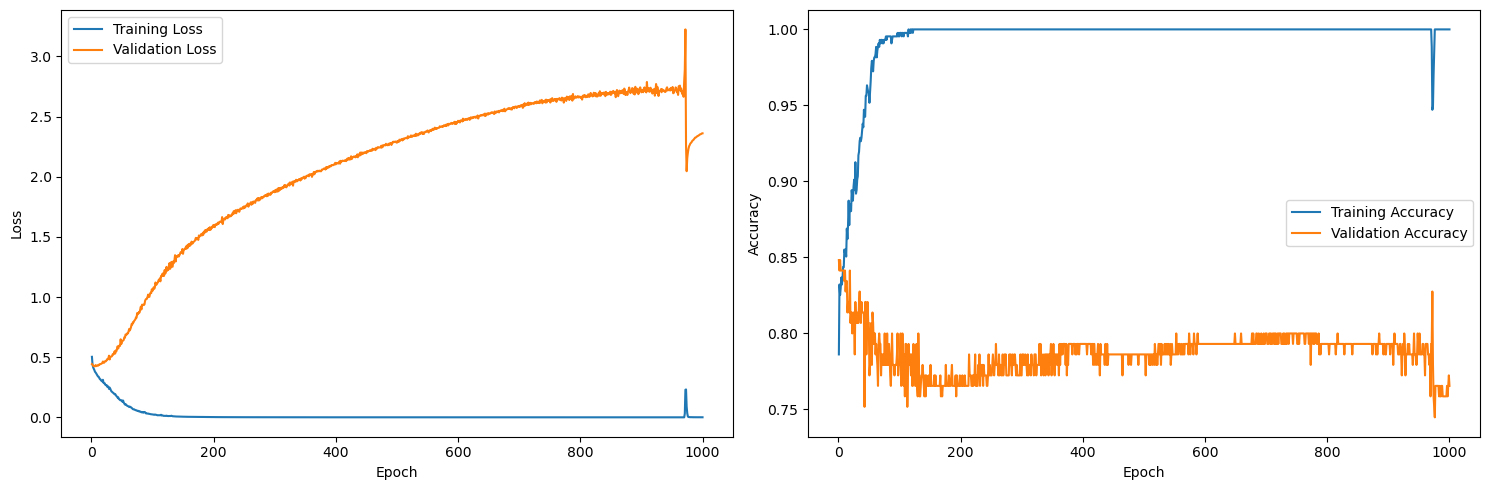

In [26]:
graph_loss_vs_epochs(history)

plot_loss_vs_accuracy(history)

plot_loss_vs_accuracy_complex(history)

In [27]:
def test_predictions(predicted_values, actual_values, threshold):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(predicted_values)):
        if predicted_values[i] > threshold:
            prediction = 1
        else:
            prediction = 0
        if prediction == actual_values[i]:
            if prediction == 1:
                TP += 1
            else:
                TN += 1
        else:
            if prediction == 1:
                FP += 1
            else:
                FN += 1
    #confusion_matrix = np.array([[TP, FP], [FN, TN]])
    confusion_matrix = [TP, FP, FN, TN]
    accuracy = (TP+TN)/len(predicted_values)
    return accuracy, confusion_matrix
            

In [28]:
def plot_accuracy(predicted_values, actual_values, low_thresh, high_thresh, CM=False):
    accuracy_results = []
    precision_rates = []
    false_ns = []
    false_ps = []
    thresholds = []
    
    for threshold in range(low_thresh, high_thresh):
        accuracy, confusion_matrix = test_predictions(predicted_values, actual_values, threshold/100)
        TP = confusion_matrix[0]
        FP = confusion_matrix[1]
        FN = confusion_matrix[2]
        TN = confusion_matrix[3]
        accuracy_results.append(accuracy)
        try:
            precision_rates.append(TP / (TP + FP))
        except:
            precision_rates.append(1)
        false_ns.append(FN/len(predicted_values))
        false_ps.append(FP/len(predicted_values))
        thresholds.append(threshold/100)
        if CM == True:
            matrix = np.array([[TP, FP], [FN, TN]])
            print(matrix)
            print(f'This would lead to {FN+TN} interviews, and would catch {round((TN/(FP+TN) * 100), 1)}% of the departees.')
            print(f'The accuracy of this prediction was {round((accuracy * 100), 1)}%')
        
    data = {'Accuracy': accuracy_results,
           'Precision': precision_rates,
           'False Negatives': false_ns,
           'False Positives': false_ps,
           'Threshold': thresholds}
    df = pd.DataFrame(data)
    df.plot('Threshold', ['Accuracy', 'Precision', 'False Negatives', 'False Positives'], figsize=(12,6))
    #probability = plt.gca().lines[2].set_linewidth(3)
    #weighted = plt.gca().lines[1].set_linestyle('--')
    plt.xlabel('Threshold')
    plt.title('Predictive Accuracy for TesorFlow Binary-Cross-Entropy Model')
    #plt.legend(loc='lower left')
    plt.show()
    
    

In [29]:
predicted_values = small_model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


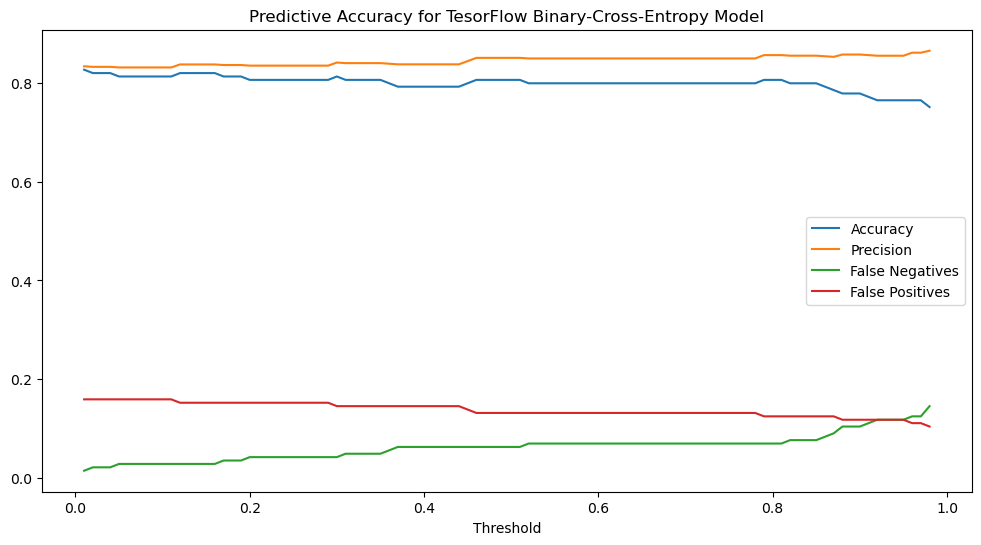

In [30]:
plot_accuracy(predicted_values, y_test, 1, 99)

[[109  19]
 [  9   8]]
This would lead to 17 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.7%
[[109  19]
 [  9   8]]
This would lead to 17 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.7%
[[108  19]
 [ 10   8]]
This would lead to 18 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.0%
[[108  19]
 [ 10   8]]
This would lead to 18 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.0%
[[108  19]
 [ 10   8]]
This would lead to 18 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.0%
[[108  19]
 [ 10   8]]
This would lead to 18 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.0%
[[108  19]
 [ 10   8]]
This would lead to 18 interviews, and would catch 29.6% of the departees.
The accuracy of this prediction was 80.0%
[[108  19]
 [ 10   8]]
This

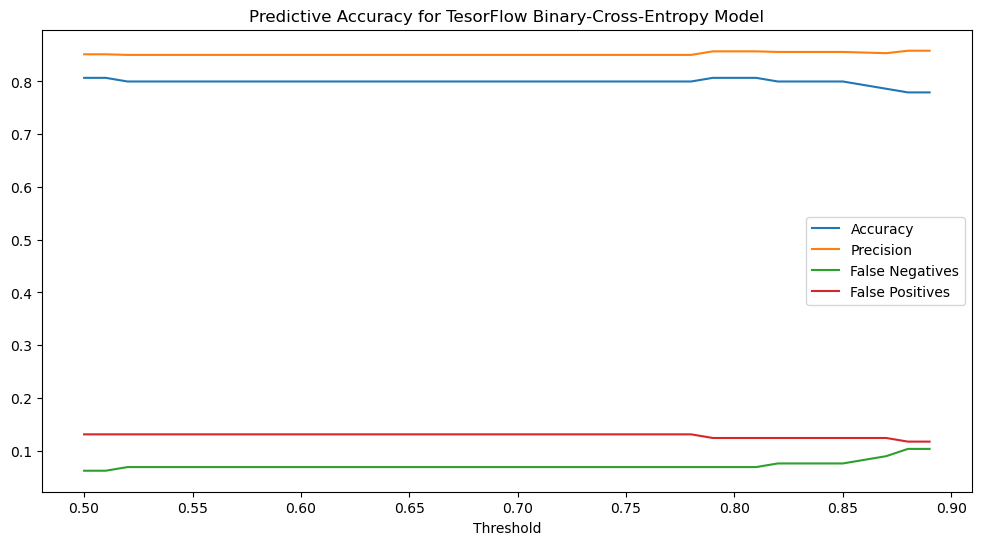

In [31]:
plot_accuracy(predicted_values, y_test, 50, 90, CM=True)

## Summary:
- 